         date  location      price  area  building_age
0  2022-01-01   Shibuya   80000000    75            10
1  2022-01-02  Shinjuku   70000000    70            12
2  2022-01-03    Minato  120000000    90             8
3  2022-02-01   Shibuya   85000000    76            11
4  2022-02-02  Shinjuku   68000000    69            13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          6 non-null      object
 1   location      6 non-null      object
 2   price         6 non-null      int64 
 3   area          6 non-null      int64 
 4   building_age  6 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 372.0+ bytes
None
              price       area  building_age
count  6.000000e+00   6.000000      6.000000
mean   8.966667e+07  78.000000     10.500000
std    2.250926e+07   8.966605      1.870829
min    6.800000e+07  69.000000      

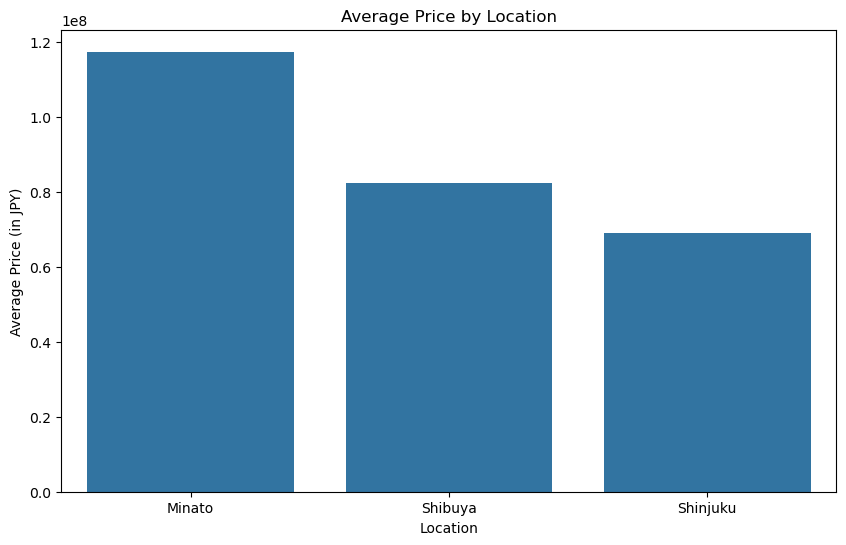

TypeError: Invalid object type at position 0

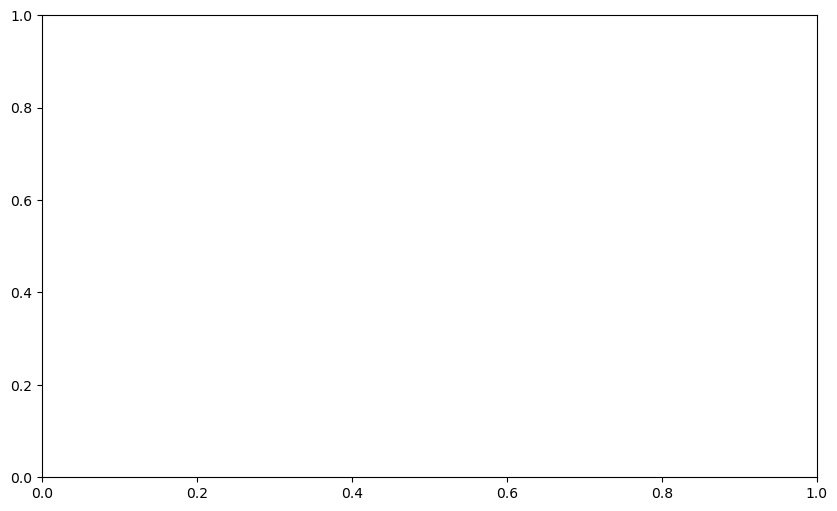

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
df = pd.read_csv('tokyo_real_estate.csv')

# データの先頭を表示
print(df.head())

# 基本的なデータ情報
print(df.info())
print(df.describe())

# データのクリーニング
# 欠損値の確認
print(df.isnull().sum())

# 欠損値があれば削除（または適切な方法で補完）
df = df.dropna()

# 日付データをdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

# 地域ごとの平均価格を計算
location_mean_price = df.groupby('location')['price'].mean().reset_index()

# 地域ごとの平均価格を可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='price', data=location_mean_price)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (in JPY)')
plt.show()

# 月ごとの価格推移を可視化
df['month'] = df['date'].dt.to_period('M')
monthly_trend = df.groupby('month')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='price', data=monthly_trend)
plt.title('Monthly Price Trend')
plt.xlabel('Month')
plt.ylabel('Average Price (in JPY)')
plt.xticks(rotation=45)
plt.show()

# 面積と価格の関係を可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='location', data=df)
plt.title('Area vs. Price')
plt.xlabel('Area (in square meters)')
plt.ylabel('Price (in JPY)')
plt.legend(title='Location')
plt.show()

# 建物の年齢と価格の関係を可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(x='building_age', y='price', hue='location', data=df)
plt.title('Building Age vs. Price')
plt.xlabel('Building Age (in years)')
plt.ylabel('Price (in JPY)')
plt.legend(title='Location')
plt.show()